# Imports

In [6]:
from IPython.display import display
from PIL import Image

# Load source image

In [15]:
source = Image.open('landscape.jpg')
source = source.convert('L')

# Quantize to black and white

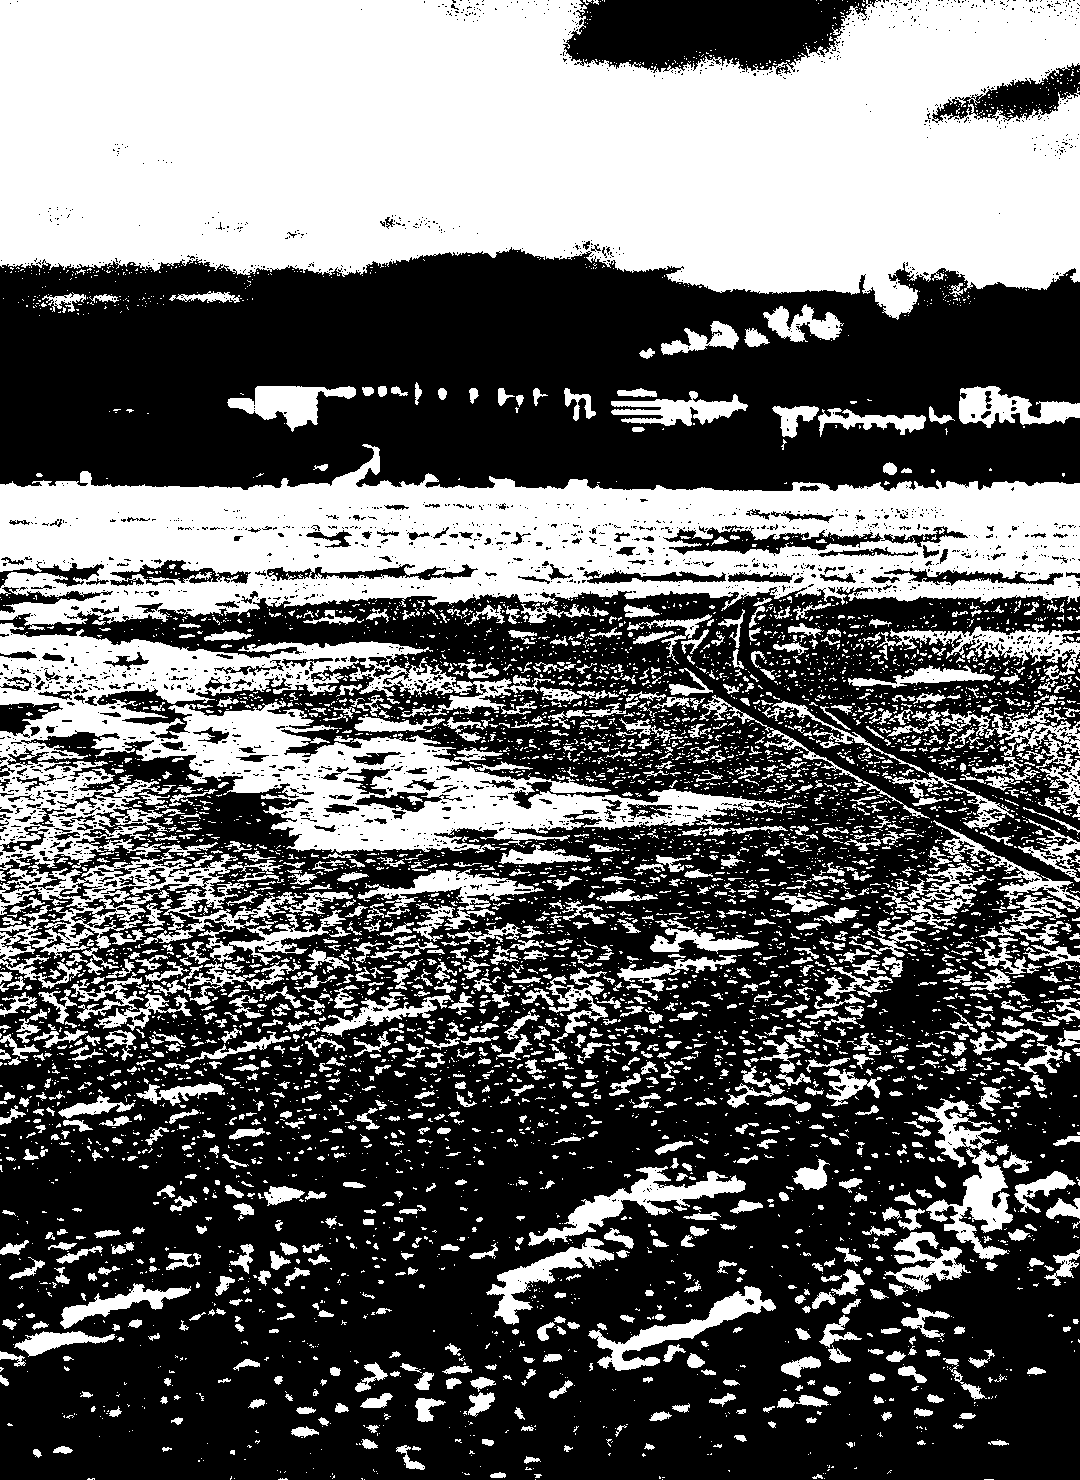

In [35]:
from itertools import product

quantized = Image.new('L', source.size)

for coord in product(range(source.size[0]), range(source.size[1])):
    l_srgb = source.getpixel(coord)
    # Converting the source image from sRGB to linear space
    # https://entropymine.com/imageworsener/srgbformula/
    # If this is not done, l < 128 will output an almost completely white image.
    s = l_srgb / 255
    if s < 0.04045:
        l = int(255 * s / 12.92)
    else:
        l = int(255.0 * ((0.055 + l_srgb / 255) / 1.055) ** 2.4)

    # Quantize the image
    if l < 128:
        quantized.putpixel(coord, 0)
    else:
        quantized.putpixel(coord, 255)

display(quantized)